In [ ]:
import pandas as pd
import numpy as np
import pickle
import sqlite3
from flask import Flask, request, render_template
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset
df = pd.read_csv("smart_healthcare_data.csv")

Data Preprocessing

In [ ]:
df['Symptoms'] = df['Symptoms'].apply(lambda x: x.lower())
X = df['Symptoms']
y = df['Disease']

Convert text data to numerical format

In [ ]:
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

Define ensemble model

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='hard')



Training and Testing

In [ ]:
# Train model
ensemble_model.fit(X_train, y_train)

# Evaluate model
predictions = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 93.75%


Save model and vectorizer

In [ ]:
pickle.dump(ensemble_model, open("model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))

Load trained model and vectorizer

In [ ]:
model = pickle.load(open("model.pkl", "rb"))
vectorizer = pickle.load(open("vectorizer.pkl", "rb"))

Simple text-based interface

In [ ]:
def predict_disease():
    symptoms = input("Enter your symptoms (comma separated): ").lower()
    symptoms_vectorized = vectorizer.transform([symptoms])
    disease_pred = model.predict(symptoms_vectorized)[0]
    recommended_tests = df[df['Disease'] == disease_pred]['Recommended Tests'].values[0]
    doctor = df[df['Disease'] == disease_pred]['Doctor to Consult'].values[0]
    precautions = df[df['Disease'] == disease_pred]['Precautions'].values[0]

    print(f"\nPredicted Disease: {disease_pred}")
    print(f"Recommended Tests: {recommended_tests}")
    print(f"Doctor to Consult: {doctor}")
    print(f"Precautions: {precautions}\n")

Run the project

#(BETA VERSION)

In [ ]:
if __name__ == "__main__":
    predict_disease()

Enter your symptoms (comma separated): body pain, fever, weakness, headache

Predicted Disease: COVID-19
Recommended Tests: RT-PCR test
Doctor to Consult: Infectious Disease Specialist
Precautions: Wear masks, Boost immunity



In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("project_data.csv")

# Display basic information and the first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Customer ID           5000 non-null   object
 1   Disease               5000 non-null   object
 2   Symptoms              5000 non-null   object
 3   Severity Level        5000 non-null   object
 4   Affected Body System  5000 non-null   object
 5   Contagious            5000 non-null   object
 6   Common Age Group      5000 non-null   object
 7   Treatment Type        5000 non-null   object
dtypes: object(8)
memory usage: 312.6+ KB


(None,
   Customer ID      Disease                   Symptoms Severity Level  \
 0    CUST1000       Dengue         Fatigue, Skin Rash         Severe   
 1    CUST1001       Stroke  Dizziness, Slurred Speech       Moderate   
 2    CUST1002  Alzheimer's    Confusion, Mood Changes         Severe   
 3    CUST1003     Leukemia       Fatigue, Weight Loss         Severe   
 4    CUST1004    Arthritis       Joint Pain, Swelling       Moderate   
 
   Affected Body System Contagious Common Age Group Treatment Type  
 0          Circulatory         No         Children        Therapy  
 1              Nervous         No           Adults        Therapy  
 2              Nervous         No          Elderly     Medication  
 3          Circulatory         No          Elderly     Medication  
 4      Musculoskeletal         No           Adults     Medication  )

Accuracy: 0.948
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.89      1.00      0.94        56
           2       1.00      1.00      1.00        60
           3       1.00      0.79      0.89        68
           4       1.00      0.77      0.87        44
           5       1.00      0.78      0.88        55
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        63
           8       1.00      1.00      1.00        54
           9       0.90      1.00      0.95        52
          10       0.72      0.79      0.75        48
          11       1.00      1.00      1.00        57
          12       1.00      1.00      1.00        57
          13       1.00      0.88      0.93        48
          14       1.00      1.00      1.00        61
          15       0.74      1.00      0.85        69
          16       1.00      1.00      1.00        44
          1

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Predicted Disease: Hypertension


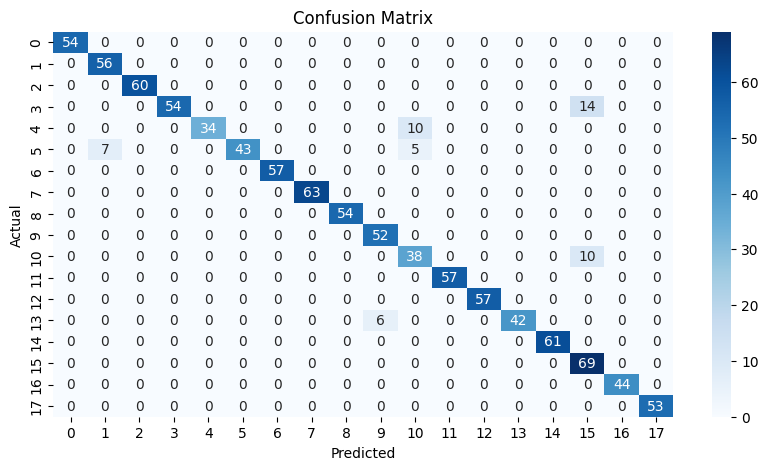

<ipython-input-4-d370ab464fab>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Accuracy'], y=[accuracy], palette='viridis')


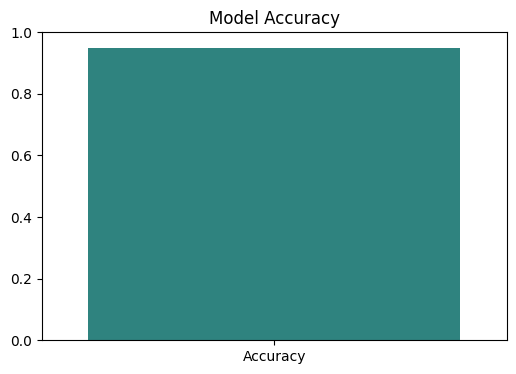

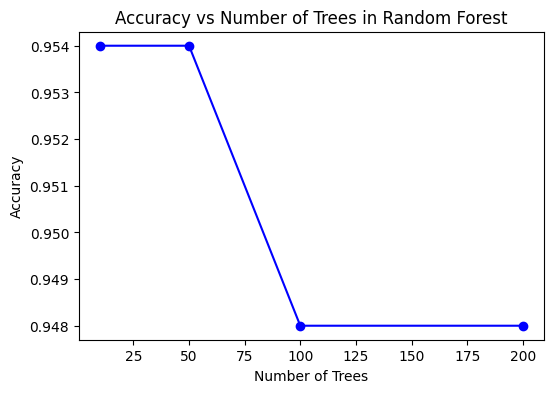

ValueError: x and y must be the same size

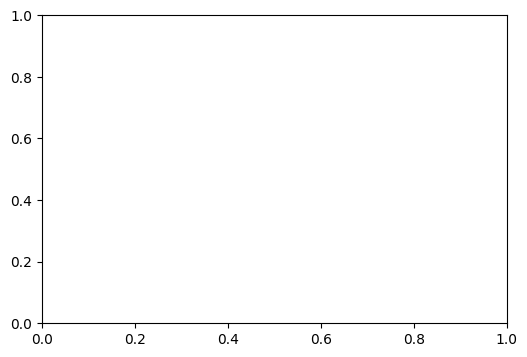

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
file_path = "project_data.csv"
df = pd.read_csv(file_path)

# Preprocessing: Convert symptoms into structured format
df['Symptoms'] = df['Symptoms'].apply(lambda x: x.split(', '))
mlb = MultiLabelBinarizer()
symptoms_encoded = mlb.fit_transform(df['Symptoms'])
symptoms_df = pd.DataFrame(symptoms_encoded, columns=mlb.classes_)

# Encode categorical variables
le_disease = LabelEncoder()
df['Disease'] = le_disease.fit_transform(df['Disease'])

# Combine encoded data
final_df = pd.concat([symptoms_df, df[['Disease']]], axis=1)

# Split dataset
X = final_df.drop(columns=['Disease'])
y = final_df['Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Function to predict disease
def predict_disease():
    print("Enter symptoms separated by commas:")
    user_input = input()
    symptom_list = [s.strip() for s in user_input.split(',')]

    input_symptoms = np.zeros(len(mlb.classes_))
    for symptom in symptom_list:
        if symptom in mlb.classes_:
            input_symptoms[np.where(mlb.classes_ == symptom)[0][0]] = 1
    prediction = model.predict([input_symptoms])
    predicted_disease = le_disease.inverse_transform(prediction)[0]
    print("Predicted Disease:", predicted_disease)

# Example Usage
predict_disease()

# Graphs for Research Paper
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x=['Accuracy'], y=[accuracy], palette='viridis')
plt.ylim(0, 1)
plt.title("Model Accuracy")
plt.show()

# Line Graph: Accuracy vs Number of Trees
num_trees = [10, 50, 100, 200]
accuracies = []
for trees in num_trees:
    temp_model = RandomForestClassifier(n_estimators=trees, random_state=42)
    temp_model.fit(X_train, y_train)
    temp_pred = temp_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, temp_pred))

plt.figure(figsize=(6,4))
plt.plot(num_trees, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Trees in Random Forest")
plt.show()

# Scatter Plot: Symptom Frequency vs Disease Count
symptom_counts = symptoms_df.sum(axis=0)
disease_counts = df['Disease'].value_counts()
plt.figure(figsize=(6,4))
plt.scatter(symptom_counts, disease_counts.loc[df['Disease'].unique()], alpha=0.5, color='r')
plt.xlabel("Symptom Frequency")
plt.ylabel("Disease Count")
plt.title("Symptom Frequency vs Disease Count")
plt.show()

# Feature Importance Bar Chart
feature_importances = model.feature_importances_
plt.figure(figsize=(10,5))
sns.barplot(x=mlb.classes_, y=feature_importances)
plt.xticks(rotation=90)
plt.xlabel("Symptoms")
plt.ylabel("Importance")
plt.title("Feature Importance in Disease Prediction")
plt.show()

Random Forest Accuracy: 0.948
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.89      1.00      0.94        56
           2       1.00      1.00      1.00        60
           3       1.00      0.79      0.89        68
           4       1.00      0.77      0.87        44
           5       1.00      0.78      0.88        55
           6       1.00      1.00      1.00        57
           7       1.00      1.00      1.00        63
           8       1.00      1.00      1.00        54
           9       0.90      1.00      0.95        52
          10       0.72      0.79      0.75        48
          11       1.00      1.00      1.00        57
          12       1.00      1.00      1.00        57
          13       1.00      0.88      0.93        48
          14       1.00      1.00      1.00        61
          15       0.74      1.00      0.85        69
          16       1.00      1.00      1.00        

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Predicted Disease: Alzheimer's


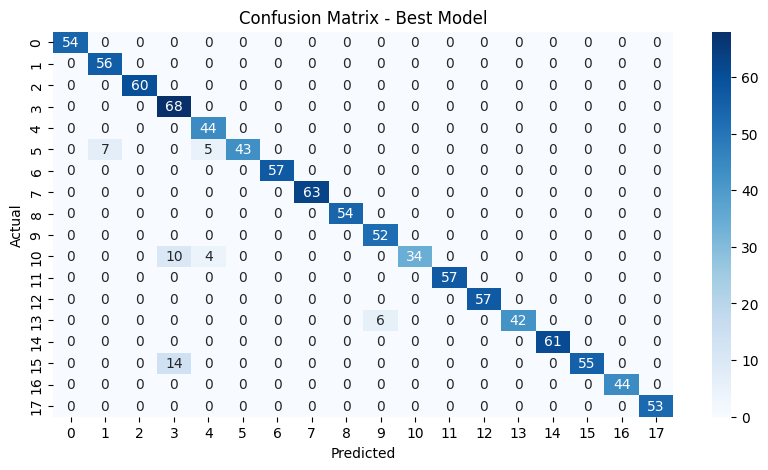

<ipython-input-5-4fe807678a75>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')


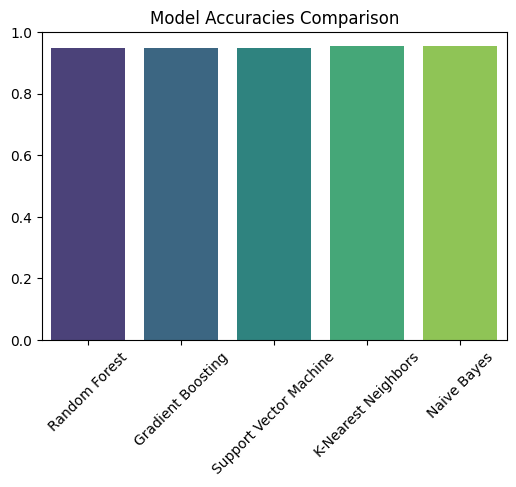

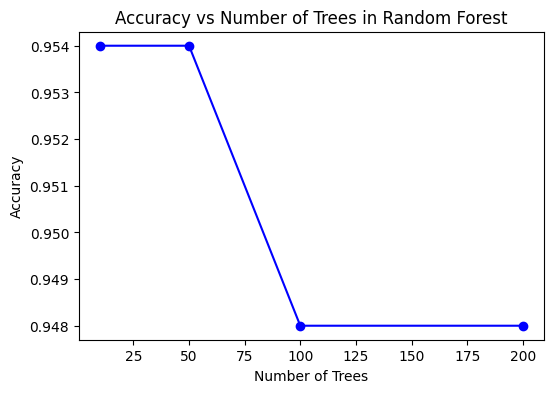

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
file_path = "project_data.csv"
df = pd.read_csv(file_path)

# Preprocessing: Convert symptoms into structured format
df['Symptoms'] = df['Symptoms'].apply(lambda x: x.split(', '))
mlb = MultiLabelBinarizer()
symptoms_encoded = mlb.fit_transform(df['Symptoms'])
symptoms_df = pd.DataFrame(symptoms_encoded, columns=mlb.classes_)

# Encode categorical variables
le_disease = LabelEncoder()
df['Disease'] = le_disease.fit_transform(df['Disease'])

# Combine encoded data
final_df = pd.concat([symptoms_df, df[['Disease']]], axis=1)

# Split dataset
X = final_df.drop(columns=['Disease'])
y = final_df['Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train multiple models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42),
    "Support Vector Machine": SVC(kernel='linear', probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f"{name} Accuracy: {acc}")
    print(classification_report(y_test, y_pred))

# Select the best performing model
best_model_name = max(accuracies, key=accuracies.get)
best_model = models[best_model_name]
print(f"Best Model: {best_model_name} with Accuracy: {accuracies[best_model_name]}")

# Function to predict disease
def predict_disease():
    print("Enter symptoms separated by commas:")
    user_input = input()
    symptom_list = [s.strip() for s in user_input.split(',')]

    input_symptoms = np.zeros(len(mlb.classes_))
    for symptom in symptom_list:
        if symptom in mlb.classes_:
            input_symptoms[np.where(mlb.classes_ == symptom)[0][0]] = 1
    prediction = best_model.predict([input_symptoms])
    predicted_disease = le_disease.inverse_transform(prediction)[0]
    print("Predicted Disease:", predicted_disease)

# Example Usage
predict_disease()

# Graphs for Research Paper
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, best_model.predict(X_test)), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best Model")
plt.show()

plt.figure(figsize=(6,4))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='viridis')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.title("Model Accuracies Comparison")
plt.show()

# Line Graph: Accuracy vs Number of Trees for Random Forest
num_trees = [10, 50, 100, 200]
rf_accuracies = []
for trees in num_trees:
    temp_model = RandomForestClassifier(n_estimators=trees, random_state=42)
    temp_model.fit(X_train, y_train)
    temp_pred = temp_model.predict(X_test)
    rf_accuracies.append(accuracy_score(y_test, temp_pred))

plt.figure(figsize=(6,4))
plt.plot(num_trees, rf_accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Number of Trees in Random Forest")
plt.show()

# Feature Importance Bar Chart
feature_importances = best_model.feature_importances_ if hasattr(best_model, 'feature_importances_') else None
if feature_importances is not None:
    plt.figure(figsize=(10,5))
    sns.barplot(x=mlb.classes_, y=feature_importances)
    plt.xticks(rotation=90)
    plt.xlabel("Symptoms")
    plt.ylabel("Importance")
    plt.title("Feature Importance in Disease Prediction")
    plt.show()
